<a href="https://colab.research.google.com/github/mcd-unison/material-programacion/blob/main/intro-pandas-num.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="100">
</p>


# Curso Propedéutico en *Programación*

# Uso de pandas en datos numéricos y temporales


**Julio Waissman Vilanova**
</center>

In [26]:
import pandas as pd

## Leyendo y revisando los datos

Para ejemplificar el uso de columnas numéricas, horas y fechas vamos a utilizar un conjunto de datos que puso generosamente a nuestra disposición [Hector Alberto Gutierrez Ibarra](hector.gutierrez@cenace.gob.mx) de la gerencia noroeste del *Centro Nacional de Control de Energía (CENACE)*.

Vamos primero pegandole un ojo a los datos:

In [27]:
path_datos = "https://github.com/juliowaissman/curso-python-cd/raw/main/datos/caso_zc_hmo.csv.zip"
df = pd.read_csv(path_datos)
df

,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
0,02/01/2016 00:00,225.622,7.3,0.0,49.0,3.2
1,02/01/2016 01:00,213.620,6.6,0.0,54.0,4.0
2,02/01/2016 02:00,207.360,5.8,0.0,60.0,5.2
3,02/01/2016 03:00,201.374,5.0,0.0,67.0,5.6
4,02/01/2016 04:00,199.018,4.4,0.0,69.0,6.0
...,...,...,...,...,...,...
48158,30/06/2021 19:00,911.216,27.4,0.0,77.0,4.0
48159,30/06/2021 20:00,833.093,27.8,0.0,74.2,2.4
48160,30/06/2021 21:00,791.669,28.2,0.0,74.0,4.0
48161,30/06/2021 22:00,783.028,28.2,0.0,73.5,2.8


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48163 entries, 0 to 48162
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             48163 non-null  object 
 1   Demand           48163 non-null  float64
 2   Temperature      48163 non-null  float64
 3   PrecipIntensity  48163 non-null  float64
 4   Humidity         48163 non-null  float64
 5   WindSpeed        48163 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.2+ MB


Lo primero que tenemos que hacer es convertir la variable `Date`en un formato de fechas. En este caso es muy fácil porque la tabla está muy bien formateada, pero suele no ser tan sencillo.

In [29]:
df['Date'] = pd.to_datetime(df.Date, format="%d/%m/%Y %H:%M")

df

,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
0,2016-01-02 00:00:00,225.622,7.3,0.0,49.0,3.2
1,2016-01-02 01:00:00,213.620,6.6,0.0,54.0,4.0
2,2016-01-02 02:00:00,207.360,5.8,0.0,60.0,5.2
3,2016-01-02 03:00:00,201.374,5.0,0.0,67.0,5.6
4,2016-01-02 04:00:00,199.018,4.4,0.0,69.0,6.0
...,...,...,...,...,...,...
48158,2021-06-30 19:00:00,911.216,27.4,0.0,77.0,4.0
48159,2021-06-30 20:00:00,833.093,27.8,0.0,74.2,2.4
48160,2021-06-30 21:00:00,791.669,28.2,0.0,74.0,4.0
48161,2021-06-30 22:00:00,783.028,28.2,0.0,73.5,2.8


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48163 entries, 0 to 48162
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             48163 non-null  datetime64[ns]
 1   Demand           48163 non-null  float64       
 2   Temperature      48163 non-null  float64       
 3   PrecipIntensity  48163 non-null  float64       
 4   Humidity         48163 non-null  float64       
 5   WindSpeed        48163 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.2 MB


In [31]:
df.describe()

,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
count,48163.000000,48163.000000,48163.000000,48163.000000,48163.000000
mean,525.771983,21.636258,0.044212,40.864779,4.759419
std,220.405604,9.296498,0.391912,23.530212,2.640389
min,184.406000,-6.700000,0.000000,0.130000,0.000000
25%,338.250000,15.000000,0.000000,22.000000,2.800000
50%,467.568000,21.700000,0.000000,37.000000,4.400000
75%,693.551500,28.500000,0.000000,57.000000,6.400000
max,1234.047000,46.400000,19.800000,100.000000,35.000000


¿Cuantos días tenemos en esta base? ¿Cual es el primer día y el último?

In [32]:
print(f"Inicia el {df.Date.min()} y termina el {df.Date.max()}")
print(f"Con una duración de {df.Date.max() - df.Date.min()}")

Inicia el 2016-01-02 00:00:00 y termina el 2021-06-30 23:00:00
Con una duración de 2006 days 23:00:00


Hay que tener cuidado porque hay dos tipos fundamentales de formatos de tiempo, y suelen no mesclarse bien en algunas operaciones.

In [33]:
type(df.Date.min()), type(df.Date.max() - df.Date.min())

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timedeltas.Timedelta)

Para facilitar el uso de pandas, vamos a pasar la fecha como el indice del dataframe

In [34]:
# df.index = df.Date
# df.drop(columns='Date', inplace=True)
df.set_index('Date', inplace=True)
df

,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
Date,,,,,
2016-01-02 00:00:00,225.622,7.3,0.0,49.0,3.2
2016-01-02 01:00:00,213.620,6.6,0.0,54.0,4.0
2016-01-02 02:00:00,207.360,5.8,0.0,60.0,5.2
2016-01-02 03:00:00,201.374,5.0,0.0,67.0,5.6
2016-01-02 04:00:00,199.018,4.4,0.0,69.0,6.0
...,...,...,...,...,...
2021-06-30 19:00:00,911.216,27.4,0.0,77.0,4.0
2021-06-30 20:00:00,833.093,27.8,0.0,74.2,2.4
2021-06-30 21:00:00,791.669,28.2,0.0,74.0,4.0


In [38]:
df['2021-05-01': '2021-05-01'] # se coloca como rango

,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
Date,,,,,
2021-05-01 00:00:00,553.348,27.0,0.0,22.2,2.8
2021-05-01 01:00:00,549.269,23.2,0.0,26.8,3.2
2021-05-01 02:00:00,522.898,22.4,0.0,28.0,3.2
2021-05-01 03:00:00,497.035,22.4,0.0,27.5,3.6
2021-05-01 04:00:00,475.905,22.8,0.0,27.0,4.0
2021-05-01 05:00:00,456.913,22.2,0.0,28.5,2.4
2021-05-01 06:00:00,439.532,22.4,0.0,29.0,4.0
2021-05-01 07:00:00,422.475,24.6,0.0,27.8,6.4
2021-05-01 08:00:00,409.969,27.0,0.0,25.5,6.4


## Gráficas rápidas y furiosas desde pandas

Pandas trae incluidas facilidades para la graficación con el fin de hacer análisis rápidos de nuestras variables, así que vamos aprovechando y haciendo una inspección visual

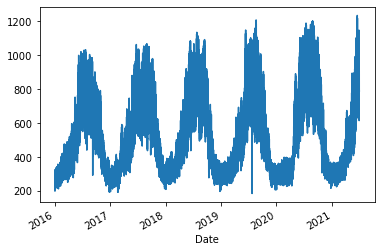

In [39]:
ax = df.Demand.plot()

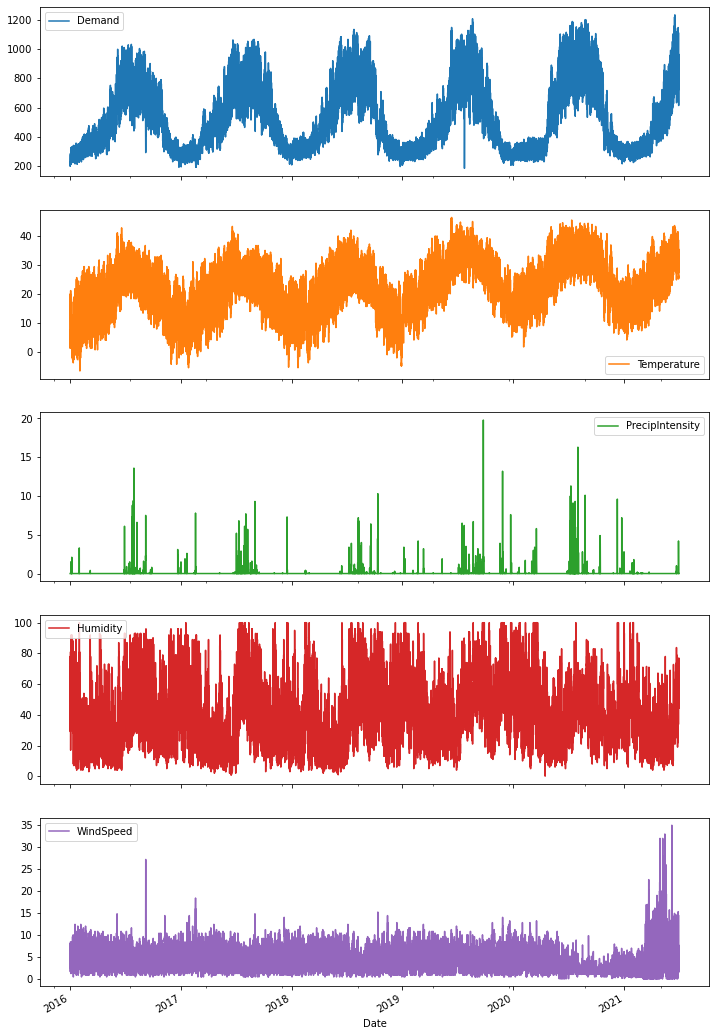

In [43]:
ax = df.plot(figsize=(12, 20), subplots=True)

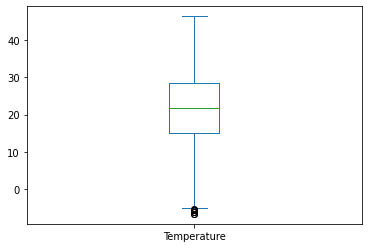

In [45]:
ax = df.Temperature.plot.box()

KeyError: 'Humidity'

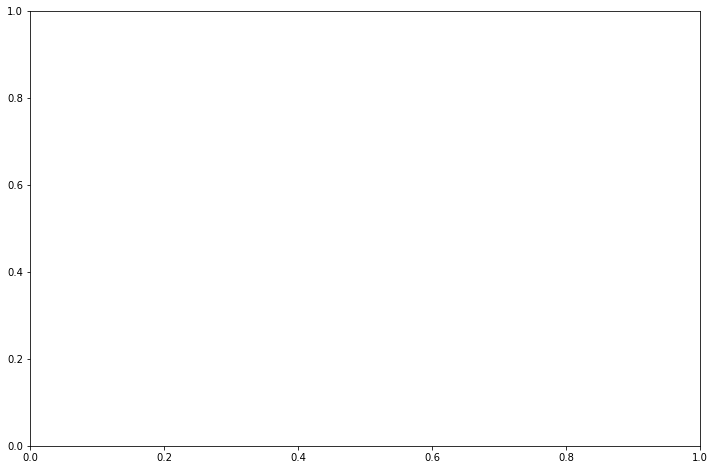

In [61]:
ax = df.plot.scatter(
    x='Humidity',
    y='Temperature',
    c='Demand',
    s =40,
    figsize=(12,8)
)

# Generando nuevas variables a partir de las variables conocidas

Generar nuevas variables es relativamente simple, pero hay algunas cosas que son diferentes con numpy y por las cuales hay que tener cuidado.

In [ ]:
df['farenheit'] = (df.Temperature * 9/5) + 32

In [62]:
df['refri'] = 0
df['refri'] = df.refri.where(df.Temperature < 30, 1) # el where en pandas es diferente al where en numpy. si no se cumple el valor coloca uno. sii se cumple no coloques nada
df.describe()

AttributeError: 'DataFrame' object has no attribute 'Temperature'

In [63]:
df['DiaSemana'] = df.index.weekday
df

,Demanda,Temperatura,Precipitación,Humedad,WindSpeed,farenheit,refri,DiaSemana
Date,,,,,,,,
2016-01-02 00:00:00,225.622,7.3,0.0,49.0,3.2,45.14,0,5
2016-01-02 01:00:00,213.620,6.6,0.0,54.0,4.0,43.88,0,5
2016-01-02 02:00:00,207.360,5.8,0.0,60.0,5.2,42.44,0,5
2016-01-02 03:00:00,201.374,5.0,0.0,67.0,5.6,41.00,0,5
2016-01-02 04:00:00,199.018,4.4,0.0,69.0,6.0,39.92,0,5
...,...,...,...,...,...,...,...,...
2021-06-30 19:00:00,911.216,27.4,0.0,77.0,4.0,81.32,0,2
2021-06-30 20:00:00,833.093,27.8,0.0,74.2,2.4,82.04,0,2
2021-06-30 21:00:00,791.669,28.2,0.0,74.0,4.0,82.76,0,2


In [64]:
df.rename(
    columns={
        'Demand': 'Demanda',
        'Temperature': 'Temperatura',
        'PrecipIntensity': 'Precipitación',
        'Humidity': 'Humedad',
        'WinSpeed': 'VelocidadViento',
    },
    inplace=True
)
df

,Demanda,Temperatura,Precipitación,Humedad,WindSpeed,farenheit,refri,DiaSemana
Date,,,,,,,,
2016-01-02 00:00:00,225.622,7.3,0.0,49.0,3.2,45.14,0,5
2016-01-02 01:00:00,213.620,6.6,0.0,54.0,4.0,43.88,0,5
2016-01-02 02:00:00,207.360,5.8,0.0,60.0,5.2,42.44,0,5
2016-01-02 03:00:00,201.374,5.0,0.0,67.0,5.6,41.00,0,5
2016-01-02 04:00:00,199.018,4.4,0.0,69.0,6.0,39.92,0,5
...,...,...,...,...,...,...,...,...
2021-06-30 19:00:00,911.216,27.4,0.0,77.0,4.0,81.32,0,2
2021-06-30 20:00:00,833.093,27.8,0.0,74.2,2.4,82.04,0,2
2021-06-30 21:00:00,791.669,28.2,0.0,74.0,4.0,82.76,0,2


## Analizando con regrupamientos

En particular, es interesante poder hacer algun análisis exploratorio utilizando las facilidades que da el uso del manejo de la información temporal que ofrece pandas. En espacial cuando se combina con `groupby` y diferentes funciones de agregación.

Vamos a empezar por ver la demanda promedio por día de la semana:

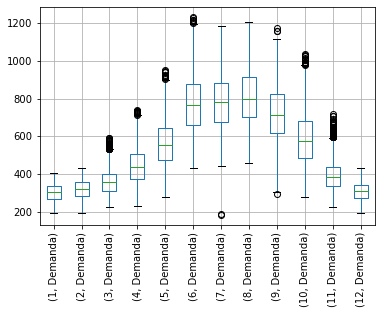

In [69]:
ax = df.
        groupby(df.index.month)[['Demanda']]
        .boxplot(subplots=False, rot=90)

<AxesSubplot:title={'center':'Demanda'}, xlabel='[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...]'>

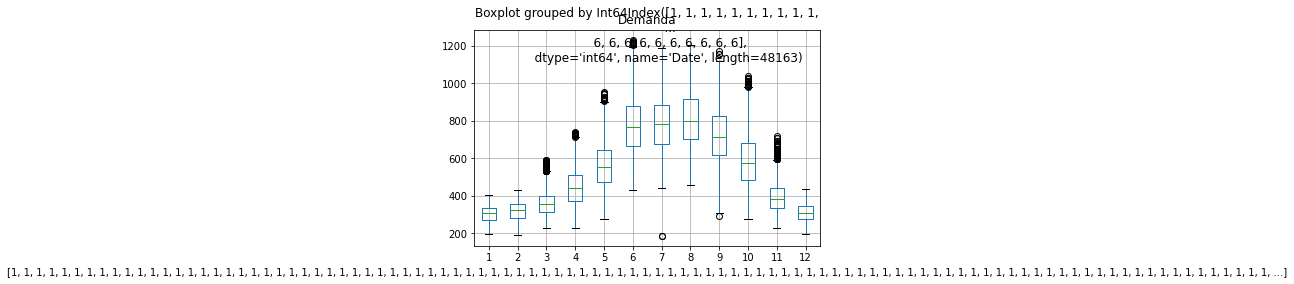

In [70]:
df.boxplot(column=['Demanda'], by=df.index.month)

In [71]:
df_semana = df.groupby('DiaSemana').agg(
    {
        'Demanda': ['min', 'max', 'mean', 'median', 'std'],
        'Precipitación': ['min', 'max']
    }
)
df_semana

Demanda                                             Precipitación  \
               min       max        mean    median         std           min   
DiaSemana                                                                      
0          192.158  1196.584  526.063869  467.0655  227.427563           0.0   
1          196.605  1207.485  541.060945  481.1390  224.332844           0.0   
2          204.323  1219.607  542.040275  481.9890  222.707674           0.0   
3          184.406  1234.047  543.177188  480.7525  223.888455           0.0   
4          217.592  1217.896  539.779390  480.2355  221.994448           0.0   
5          198.430  1141.884  512.861563  457.8225  210.097151           0.0   
6          192.203  1081.747  475.493604  418.7660  203.003469           0.0   

                 
            max  
DiaSemana        
0           8.8  
1          10.1  
2          19.8  
3           9.6  
4          11.3  
5          13.6  
6          16.3

Ahora vamos a ver que pasa en forma mensual

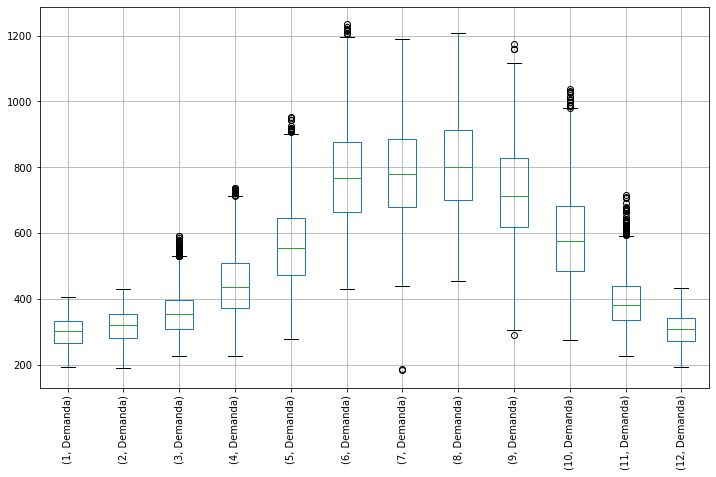

In [72]:
ax = df[['Demanda']].groupby(df.index.month).boxplot(subplots=False, rot=90, figsize=(12, 7))
# ax = df[['Demanda']].groupby(df.index.weekday).boxplot(subplots=False, rot=90, figsize=(12, 7))
#ax = df[['Demanda']].groupby(df.index.weeknames).boxplot(subplots=False, rot=90, figsize=(12, 7))

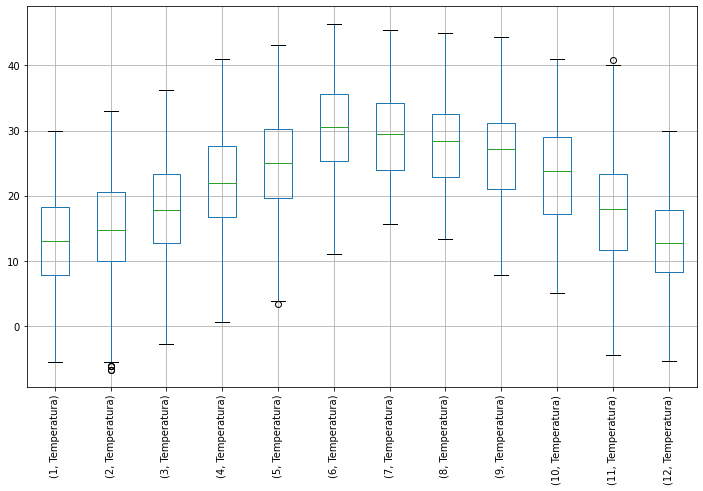

In [73]:
ax = df[['Temperatura']].groupby(df.index.month).boxplot(subplots=False, rot=90, figsize=(12, 7))

O inclusive por hora del día

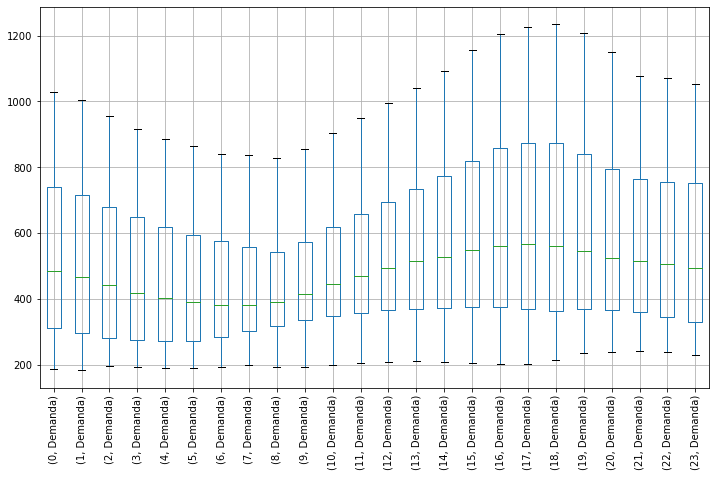

In [74]:
ax = df[['Demanda']].groupby(df.index.hour).boxplot(subplots=False, rot=90, figsize=(12, 7))

In [75]:
df_hora = df[['Demanda', 'Temperatura']].groupby([df.index.hour, df.index.month_name()]).mean().unstack()
df_hora

Demanda                                                              \
Date       April      August    December    February     January        July   
Date                                                                           
0     448.732089  833.277277  295.464129  298.630971  284.280784  808.319781   
1     431.580211  809.785548  279.089206  282.629900  269.599281  791.148806   
2     413.064709  771.484787  268.734645  271.886818  260.116551  760.156523   
3     391.835067  739.520942  261.806897  265.007076  253.609865  727.604168   
4     376.645039  710.849387  258.211826  261.962094  250.718438  697.936329   
5     365.252906  687.343903  259.239090  263.047124  251.809643  673.425335   
6     358.743656  668.044690  266.541497  271.993876  260.464741  653.276671   
7     356.412817  650.430865  282.641277  291.551088  279.498854  629.756961   
8     360.974783  637.365477  292.883155  304.401406  289.773303  619.064116   
9     388.120578  669.204213  307.032129  321.333153  301.902914  647.582697   
10    416.243878  717.168213  318.613910  334.224571  312.729903  689.327529   
11    439.973256  762.338703  326.061045  343.230988  320.346432  731.152806   
12    460.235989  804.072910  331.584032  350.450659  326.229973  771.224884   
13    478.244161  846.788697  332.258445  352.129276  326.727157  812.266858   
14    490.952289  888.404445  334.143290  354.031618  328.008432  855.109929   
15    505.243528  932.993103  335.376768  355.518200  328.783103  900.403148   
16    519.221172  968.819729  333.952929  353.899859  327.059686  937.041503   
17    526.086367  980.125587  332.584316  350.151412  324.616184  950.619568   
18    524.327906  972.599606  337.383310  344.263341  322.082605  946.541284   
19    509.383472  943.254019  346.682452  351.407765  335.131384  919.459316   
20    489.701211  896.165594  341.657065  354.030306  334.466276  875.924987   
21    485.247017  863.709432  333.055381  346.271824  327.404708  833.030058   
22    474.967744  858.047503  320.952568  332.505865  315.338665  825.596542   
23    464.941744  848.705323  308.494329  316.195724  301.271222  820.023755   

                                                      ... Temperatura  \
Date        June       March         May    November  ...    December   
Date                                                  ...               
0     808.371839  337.861312  592.498430  372.460507  ...   10.715484   
1     788.809772  319.658581  574.092575  351.458833  ...    9.939355   
2     749.662456  306.967430  542.380753  337.864660  ...    9.282581   
3     713.314622  297.823290  513.308108  327.610213  ...    8.763226   
4     680.180394  292.704909  487.413097  320.982740  ...    8.174839   
5     650.739194  292.057586  464.959360  319.463653  ...    7.839355   
6     624.723461  299.263199  447.087129  325.802367  ...    7.576129   
7     591.985606  311.544629  428.083806  340.430853  ...    7.334194   
8     583.019406  331.335570  426.218505  355.847887  ...    6.995484   
9     615.364806  354.401866  455.087091  379.212020  ...    7.713548   
10    661.665267  371.575425  491.660995  398.790087  ...   10.389032   
11    705.932439  384.594366  524.367591  414.917253  ...   13.384516   
12    748.501278  396.318339  553.652317  429.649313  ...   16.061290   
13    793.743728  401.298065  583.019484  438.409700  ...   17.934194   
14    840.929728  406.176462  610.537586  447.655020  ...   19.281935   
15    893.202500  410.312269  645.063522  454.599933  ...   19.918065   
16    936.781239  410.151855  679.108882  454.438493  ...   20.046452   
17    957.641911  405.993086  699.003677  447.909700  ...   19.634839   
18    957.546617  395.102242  701.796425  438.450320  ...   18.576774   
19    930.344928  388.049495  681.632629  434.755133  ...   16.314839   
20    879.583144  394.125849  643.370188  424.569147  ...   14.519355   
21    828.059378  385.728059  616.101995  413.515953  ...   13.243226   
22    817.715172  371.4

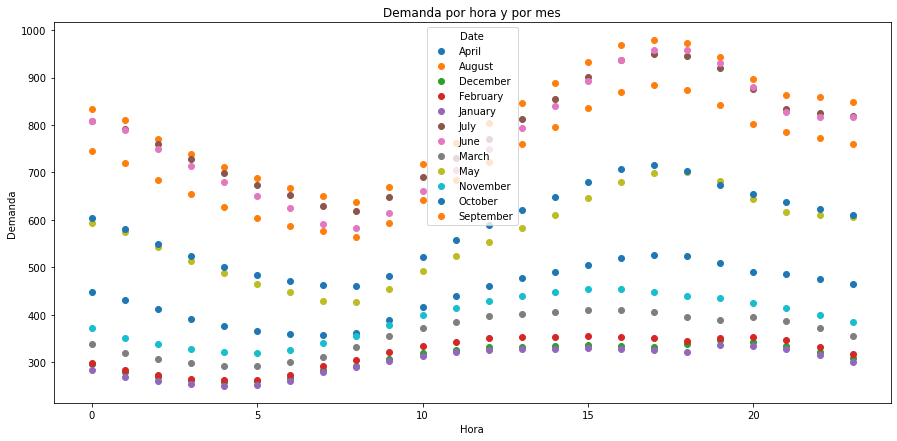

In [76]:
ax = df_hora.Demanda.plot(
    style='o', 
    figsize=(15,7),
    title='Demanda por hora y por mes',
    xlabel='Hora',
    ylabel='Demanda'
)

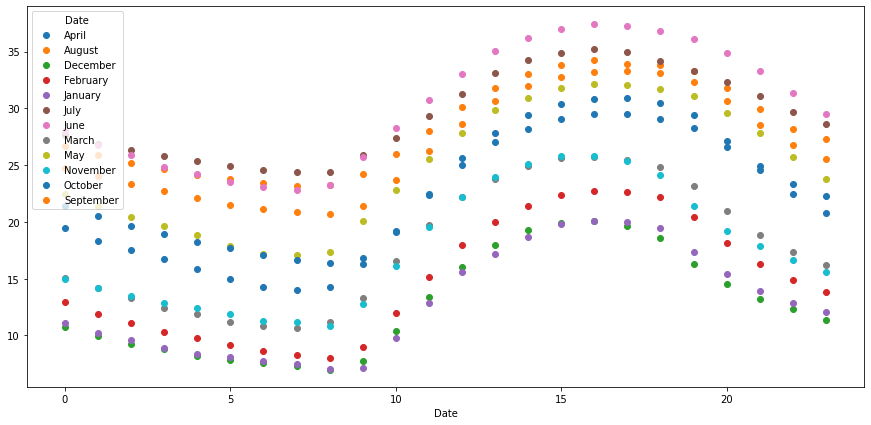

In [77]:
ax = df_hora.Temperatura.plot(style='o', figsize=(15,7))